In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

df = pd.read_csv('C:\\Users\\scott\\Documents\\Project-To-Do\\Unsupervised Machine Learning County\\Data\\Country-data.csv')

In [2]:
missing_values = df.isna()
# Get the count of missing values per column
missing_counts = df.isna().sum()
# Get rows with any missing values
rows_with_missing = df[df.isna().any(axis=1)]
print(rows_with_missing)
df.describe().T

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [3]:
df.head(5) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
## Need to Re Do Some Columns b/c their written based upon GDPP 


df['health'] = df['health'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100

New_df = df.round(2)
New_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [6]:
New_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.60,8.250,19.30,62.10,208.00
exports,167.0,7420.618862,17973.885789,1.08,447.140,1777.44,7278.00,183750.00
health,167.0,1056.733174,1801.408921,12.82,78.535,321.89,976.94,8663.60
imports,167.0,6588.352096,14710.810423,0.65,640.215,2045.58,7719.60,149100.00
income,167.0,17144.688623,19278.067698,609.00,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781737,10.570770,-4.21,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.10,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.15,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.00,1330.000,4660.00,14050.00,105000.00


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\P

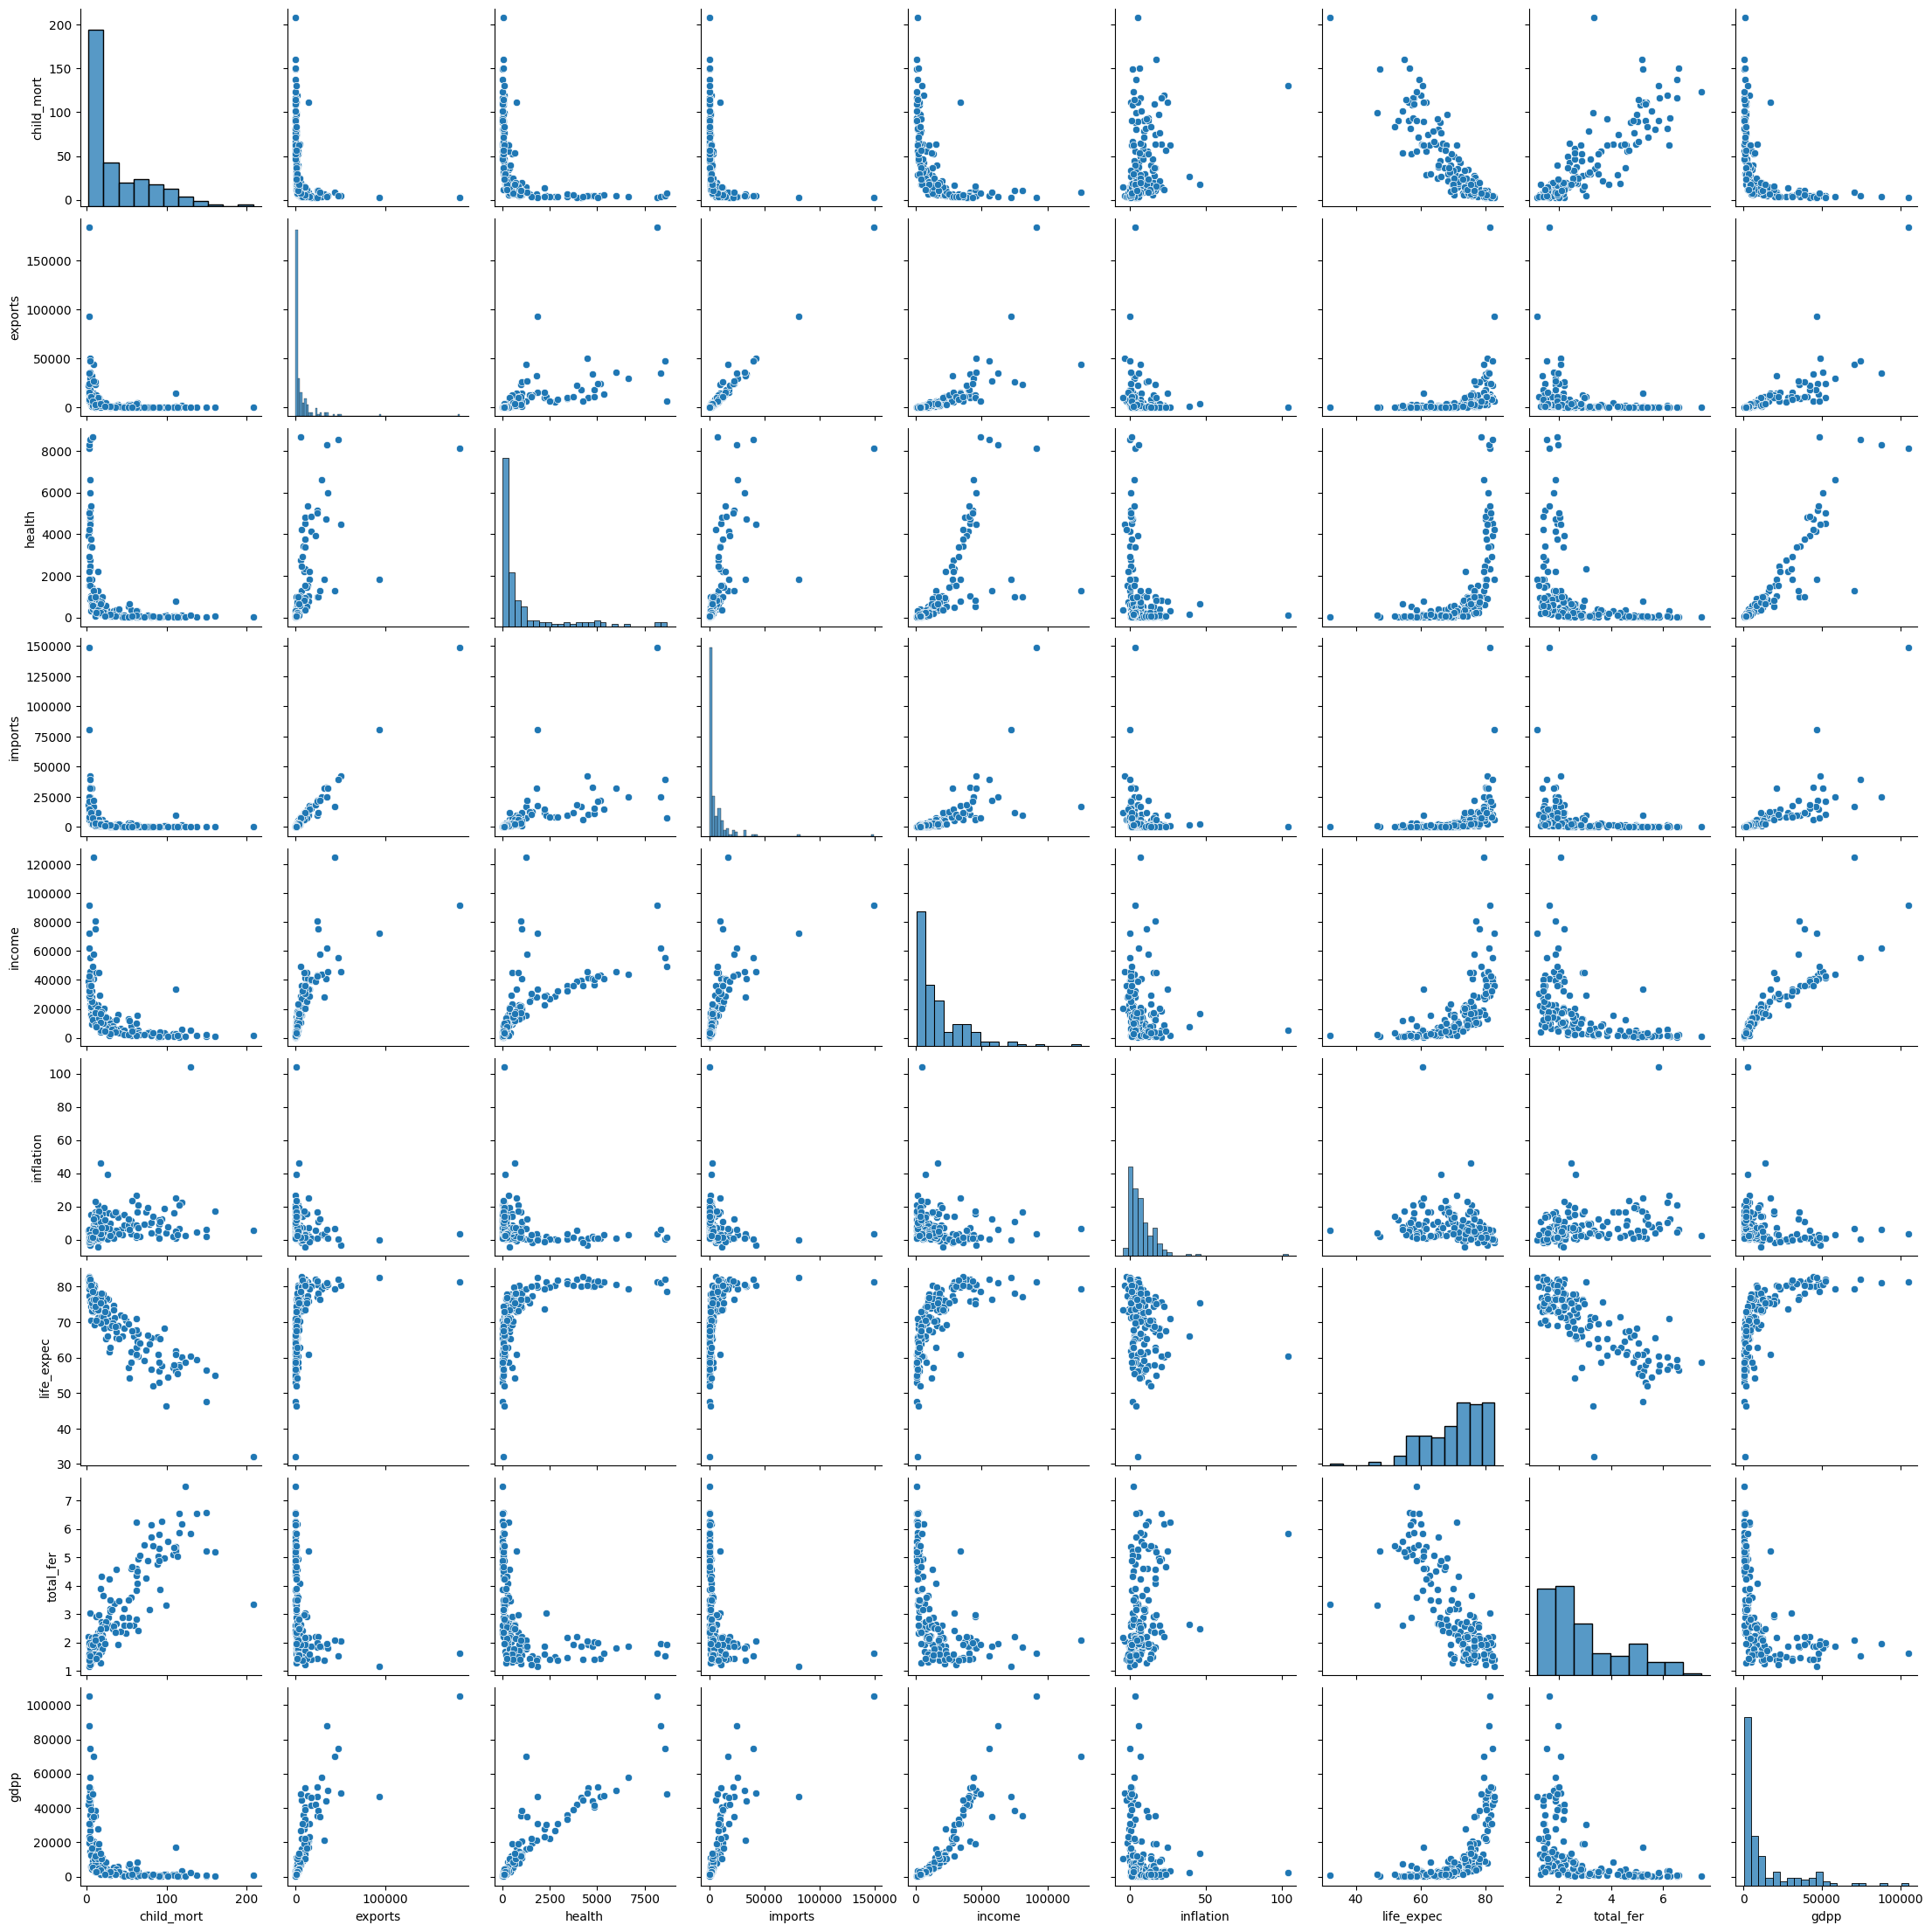

In [8]:
sns.pairplot(New_df, palette ='viridis')

In [10]:
missing_values = New_df.isna()
# Get the count of missing values per column
missing_counts = New_df.isna().sum()
# Get rows with any missing values
rows_with_missing = New_df[New_df.isna().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


In [11]:
# Scaling the Data 
float_columns = [x for x in New_df.columns if x not in ['country']]


corr_mat = New_df[float_columns].corr()

for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,0.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288275,-0.886676,0.848478,-0.483032
exports,-0.297230,0.000000,0.612919,0.987686,0.725351,-0.141559,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,0.000000,0.638581,0.690857,-0.253951,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,0.000000,0.672056,-0.179466,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,0.000000,-0.147759,0.611962,-0.501840,0.895571
inflation,0.288275,-0.141559,-0.253951,-0.179466,-0.147759,0.000000,-0.239707,0.316921,-0.221629
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239707,0.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,0.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221629,0.600089,-0.454910,0.000000


In [12]:
corr_mat.abs().max()

child_mort    0.886676
exports       0.987686
health        0.916593
imports       0.987686
income        0.895571
inflation     0.316921
life_expec    0.886676
total_fer     0.848478
gdpp          0.916593
dtype: float64

In [13]:
skew_columns = (New_df[float_columns].skew().sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns >0.75]

skew_columns

exports       6.720171
imports       6.618500
inflation     5.153968
health        2.526029
income        2.231480
gdpp          2.218051
child_mort    1.450774
total_fer     0.967092
dtype: float64

In [14]:
skew_df = New_df.copy()
for col in skew_columns.index.tolist():
    skew_df[col] = np.log1p(skew_df[col])


missing_values = skew_df.isna()
# Get the count of missing values per column
missing_counts = skew_df.isna().sum()
# Get rows with any missing values
rows_with_missing = skew_df[skew_df.isna().any(axis=1)]
print(rows_with_missing)


### NOT GOING TO USE SKEW IN THIS AgDATASET (WOULD RATHER WORK WITH PCA SINCE THAT IS HIGHER AND MORE APPARENT) 

### MAY USE ROBPCA or SCA 

            country  child_mort    exports    health    imports     income  \
43   Czech Republic    1.481605   9.477998  7.353236   9.429893  10.250652   
73          Ireland    1.648659  10.823013  8.406603  10.648432  10.729875   
77            Japan    1.435085   8.806274  8.348550   8.708309  10.485731   
131      Seychelles    2.734368   9.223395  5.908626   9.364348   9.923339   

     inflation  life_expec  total_fer       gdpp  
43         NaN        77.5   0.920283   9.893488  
73         NaN        80.4   1.115142  10.793455  
77         NaN        82.8   0.871293  10.703267  
131        NaN        73.4   1.153732   9.287394  


c:\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
missing_values = New_df.isna()
# Get the count of missing values per column
missing_counts = New_df.isna().sum()
# Get rows with any missing values
rows_with_missing = New_df[New_df.isna().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


In [16]:
sc = StandardScaler() 

New_df[float_columns] = sc.fit_transform(New_df[float_columns])


In [17]:
missing_values = New_df.isna()
# Get the count of missing values per column
missing_counts = New_df.isna().sum()
# Get rows with any missing values
rows_with_missing = New_df[New_df.isna().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\P

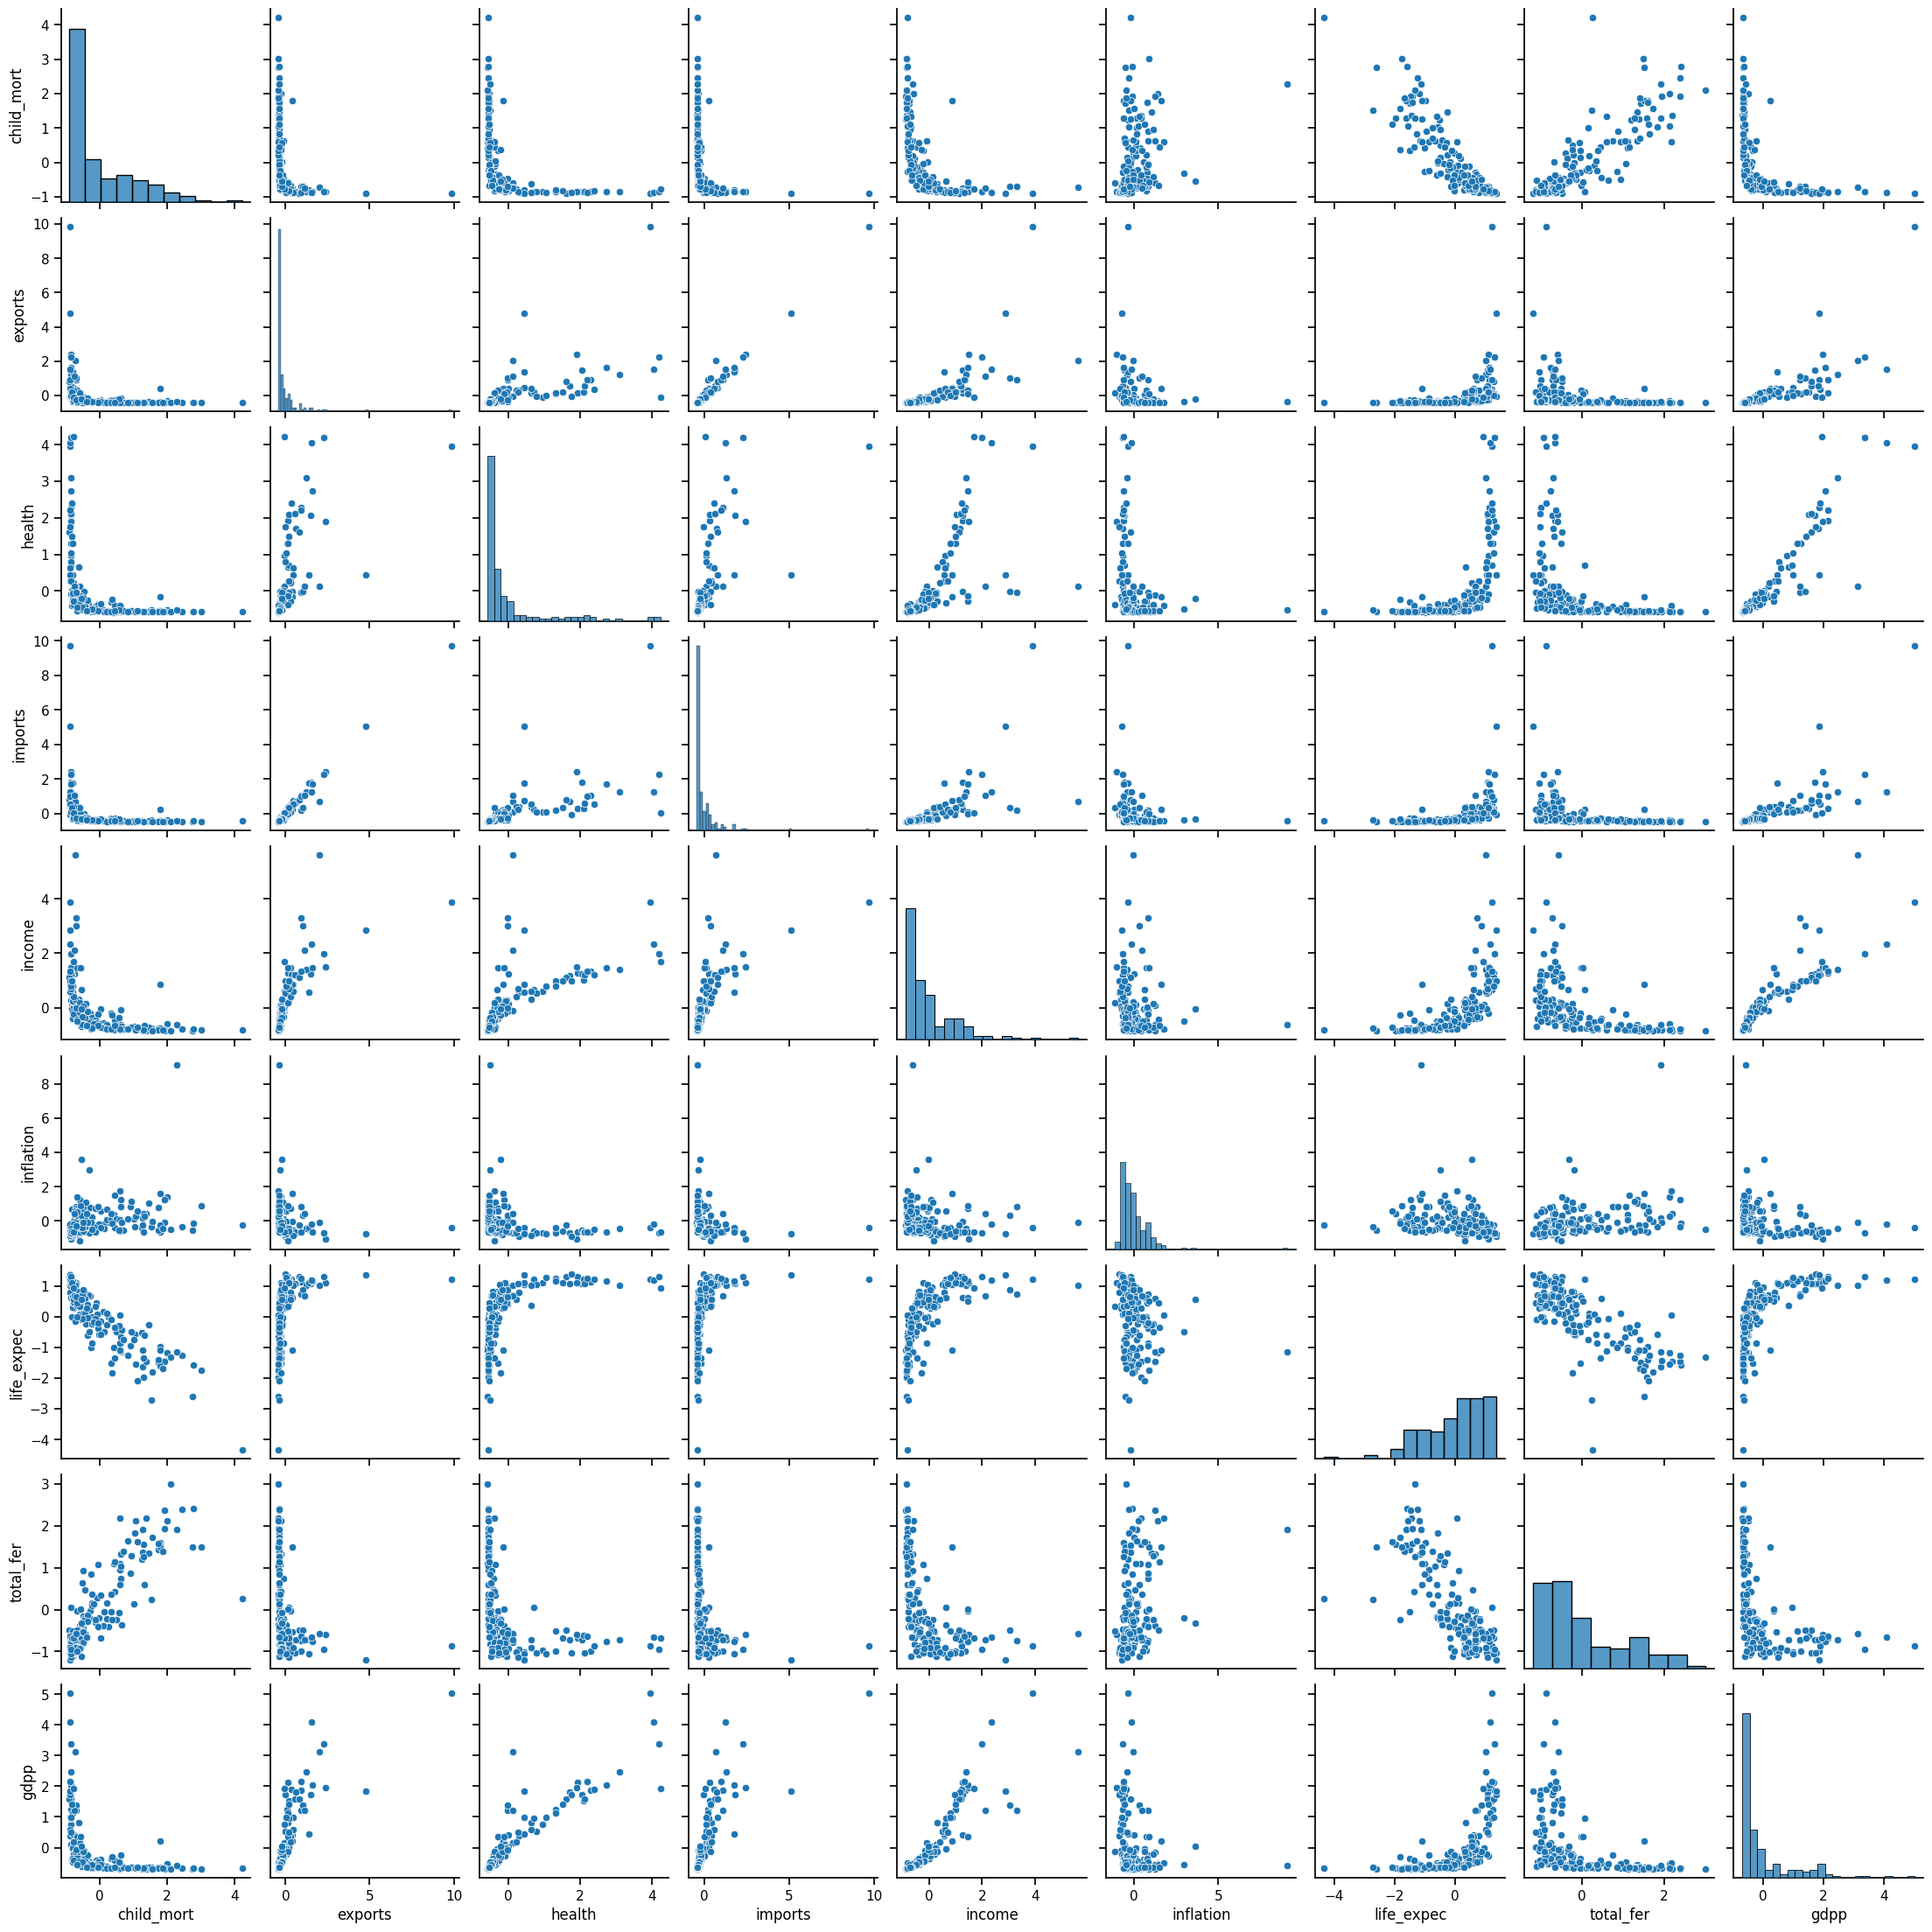

In [18]:
sns.set_context('notebook')
sns.pairplot(New_df, palette ='viridis')

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca_df = pd.DataFrame(pca.fit_transform(New_df[float_columns]), columns= [f"pc{i}" for i in range (1,10)], index = New_df.country)
pca.explained_variance_

array([5.33631177e+00, 1.67006370e+00, 8.97405410e-01, 5.49797409e-01,
       2.74268669e-01, 2.22718612e-01, 8.50865381e-02, 1.40921731e-02,
       4.47258722e-03])

In [20]:
New_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157344,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312336,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789278,0.670423,-0.038404,-0.465376
3,Angola,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601736,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,-0.336864,-0.501559,-0.342488,-0.738527,-0.489771,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616852,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,-0.361463,-0.538491,-0.377572,-0.658404,0.409738,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.392166,-0.550595,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [21]:
Removed_Country_DF = New_df.drop('country', axis = 1)

In [22]:
# PCA SELECTION 

pca_list = list() 

feature_weight_list = list() 

for n in range(1,10):
    
    PCAmod = PCA(n_components=n)
    PCAmod.fit(Removed_Country_DF)
    pca_list.append(pd.Series({
        'n':n,
        'model':PCAmod,
        'var':PCAmod.explained_variance_ratio_.sum()
    }))
    
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_.sum()
    overall_contribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contribution.sum(axis = 0)
    feature_weight_list.append(
        pd.DataFrame({
            'n':n,
            'feature':Removed_Country_DF.columns,
            'values':abs_feature_values/abs_feature_values.sum()
        })
    )

imporved_pca_df = pd.concat(pca_list,axis=1).T.set_index ('n')
imporved_pca_df

,model,var
n,,
1,PCA(n_components=1),0.589373
2,PCA(n_components=2),0.773825
3,PCA(n_components=3),0.872939
4,PCA(n_components=4),0.933662
5,PCA(n_components=5),0.963954
6,PCA(n_components=6),0.988552
7,PCA(n_components=7),0.99795
8,PCA(n_components=8),0.999506
9,PCA(n_components=9),1.0


In [ ]:
PCAmod.emb

In [23]:
feature_weight_list

[   n     feature    values
 0  1  child_mort  0.107892
 1  1     exports  0.116927
 2  1      health  0.122263
 3  1     imports  0.117601
 4  1      income  0.129597
 5  1   inflation  0.048793
 6  1  life_expec  0.117257
 7  1   total_fer  0.103271
 8  1        gdpp  0.136399,
    n     feature    values
 0  2  child_mort  0.122412
 1  2     exports  0.122881
 2  2      health  0.107057
 3  2     imports  0.121218
 4  2      income  0.110518
 5  2   inflation  0.055843
 6  2  life_expec  0.120874
 7  2   total_fer  0.117486
 8  2        gdpp  0.121710,
    n     feature    values
 0  3  child_mort  0.119985
 1  3     exports  0.115510
 2  3      health  0.102652
 3  3     imports  0.115675
 4  3      income  0.108752
 5  3   inflation  0.090923
 6  3  life_expec  0.120477
 7  3   total_fer  0.112437
 8  3        gdpp  0.113589,
    n     feature    values
 0  4  child_mort  0.116610
 1  4     exports  0.119549
 2  4      health  0.110998
 3  4     imports  0.119997
 4  4      income

In [24]:
feautre_df = (pd.concat(feature_weight_list).pivot(index = 'n', columns = 'feature', values = 'values'))
feautre_df

feature,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
n,,,,,,,,,
1,0.107892,0.116927,0.136399,0.122263,0.117601,0.129597,0.048793,0.117257,0.103271
2,0.122412,0.122881,0.121710,0.107057,0.121218,0.110518,0.055843,0.120874,0.117486
3,0.119985,0.115510,0.113589,0.102652,0.115675,0.108752,0.090923,0.120477,0.112437
4,0.116610,0.119549,0.115728,0.110998,0.119997,0.106182,0.085882,0.113994,0.111060
5,0.114987,0.117121,0.113958,0.114032,0.120036,0.112811,0.085395,0.113035,0.108625
6,0.114721,0.115363,0.112317,0.113637,0.117979,0.111124,0.084851,0.116395,0.113612
7,0.116658,0.114680,0.111759,0.113143,0.117327,0.110500,0.084391,0.117692,0.113849
8,0.116536,0.114589,0.112102,0.113271,0.117276,0.110610,0.084304,0.117567,0.113746
9,0.116499,0.114683,0.112088,0.113257,0.117360,0.110588,0.084278,0.117534,0.113713


[Text(0.5, 0, 'Number of Dimensions (Features)'),
 Text(0, 0.5, 'Percentage Explained By Variance'),
 Text(0.5, 1.0, 'Explained Variance vs Dimensions (Features)')]

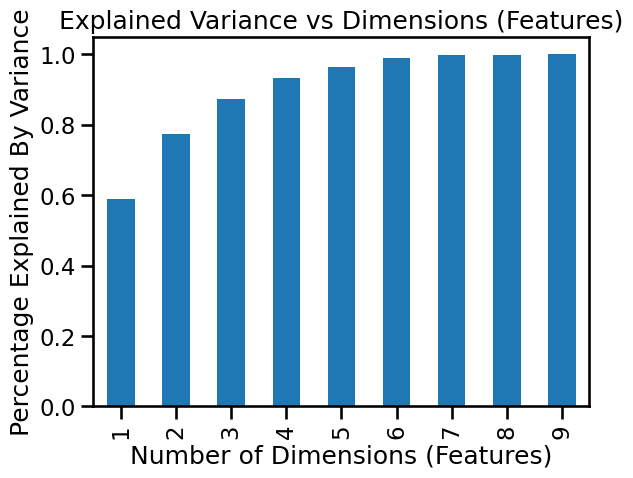

In [25]:
sns.set_context('talk')
ax = imporved_pca_df['var'].plot(kind = 'bar')

ax.set(
    xlabel = 'Number of Dimensions (Features)',
    ylabel = 'Percentage Explained By Variance',
    title = 'Explained Variance vs Dimensions (Features)'
)

[Text(0.5, 0, 'Number of Dimensions (Features)'),
 Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 1.0, 'Feature Importance vs Dimensions')]

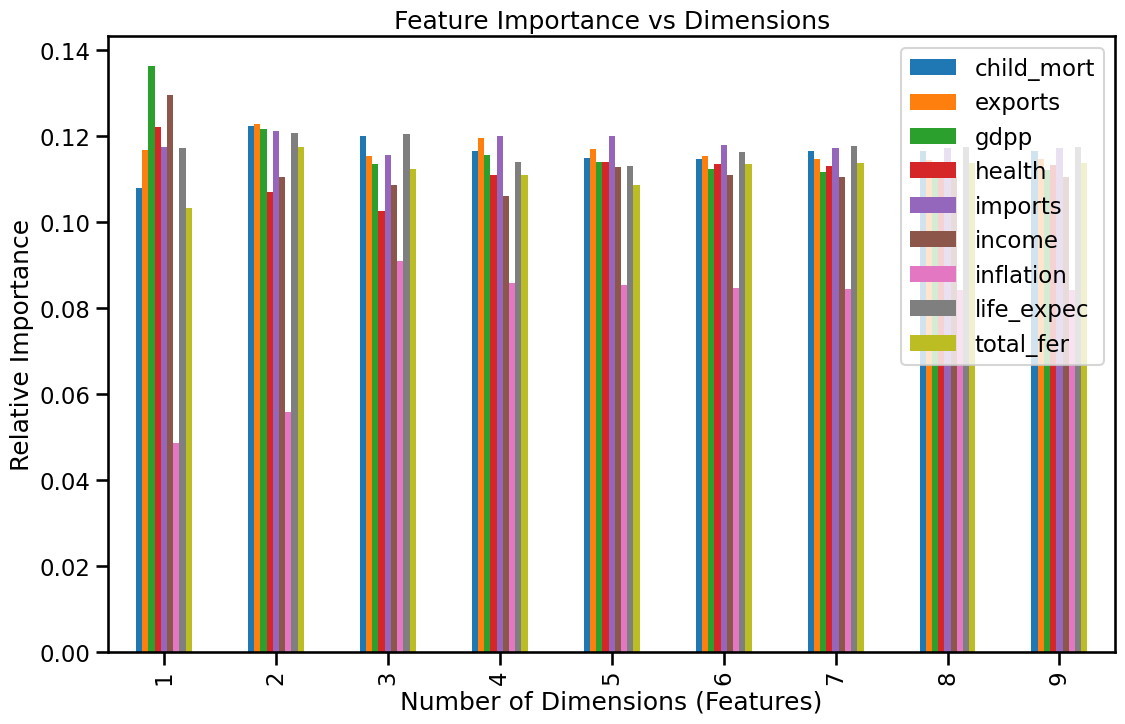

In [26]:
ax = feautre_df.plot(kind = 'bar', figsize = (13,8))
ax.legend(loc = 'upper right')
ax.set(
    xlabel = 'Number of Dimensions (Features)',
    ylabel = 'Relative Importance',
    title = 'Feature Importance vs Dimensions'
)

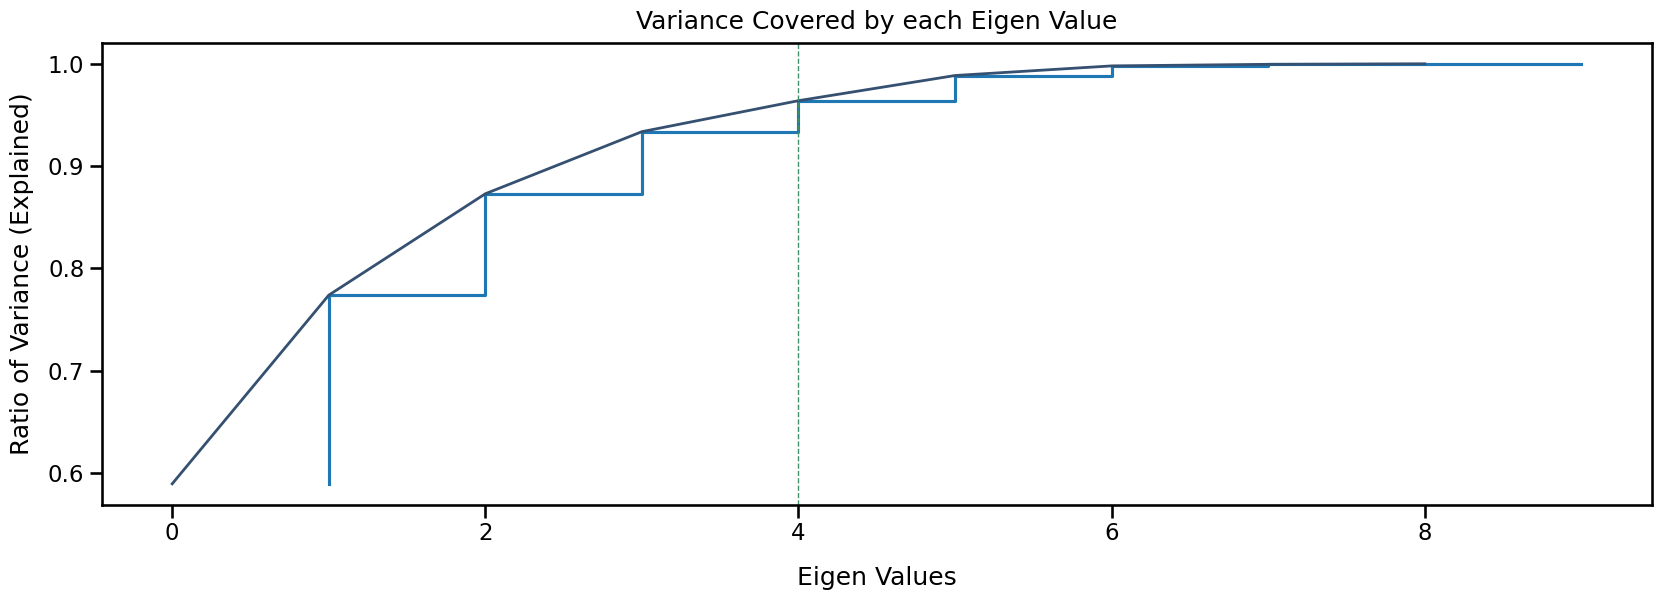

In [27]:
plt.figure(figsize=(20, 6))
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_)) # plot cusum of explained_variacne_ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="#355070", linewidth=2)
plt.axvline(x=4, color="#40916c", label='axvline-fullheight', ls='--', linewidth=1)
plt.xlabel('Eigen Values', labelpad=15)
plt.ylabel('Ratio of Variance (Explained)', labelpad=10)
plt.title('Variance Covered by each Eigen Value', pad=10)
plt.show()

In [28]:
final_df = pca_df.iloc[:,0:5]

In [29]:
# K Means

km = KMeans(n_clusters=2, random_state=42)
km = km.fit(final_df)

final_df['KMeans'] = km.predict(final_df)

final_df.head(5)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\scott\AppData\Local\Temp\ipykernel_2532\2526594785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['KMeans'] = km.predict(final_df)


,pc1,pc2,pc3,pc4,pc5,KMeans
country,,,,,,
Afghanistan,-2.635575,1.472273,-0.549469,-0.242336,0.023530,0
Albania,-0.024206,-1.429890,-0.014132,0.450640,-0.125826,0
Algeria,-0.459559,-0.675500,0.959347,0.218481,-0.113267,0
Angola,-2.722632,2.172329,0.600233,-0.433954,0.005445,0
Antigua and Barbuda,0.648596,-1.023433,-0.257432,0.289193,0.072693,0


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

,pc1,pc2,pc3,pc4,pc5,KMeans
country,,,,,,
Afghanistan,-2.635575,1.472273,-0.549469,-0.242336,0.023530,3
Albania,-0.024206,-1.429890,-0.014132,0.450640,-0.125826,5
Algeria,-0.459559,-0.675500,0.959347,0.218481,-0.113267,0
Angola,-2.722632,2.172329,0.600233,-0.433954,0.005445,3
Antigua and Barbuda,0.648596,-1.023433,-0.257432,0.289193,0.072693,5


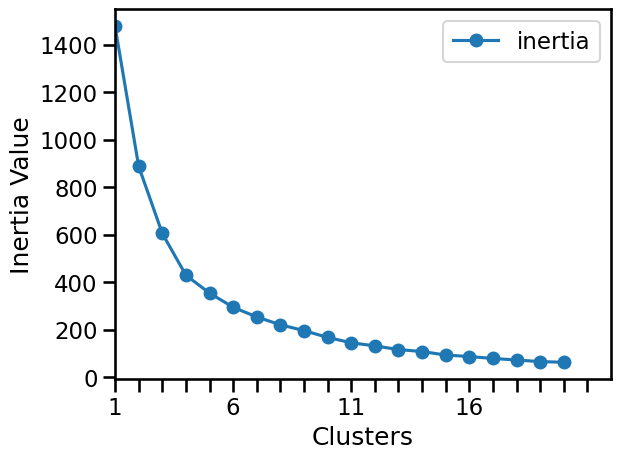

In [30]:
kmeans_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters= clust, random_state = 42) 
    km = km.fit(final_df)
    kmeans_list.append(pd.Series({
        'clusters':clust,
        'inertia':km.inertia_,
        'model': km
    }))

plot_data = (pd.concat(kmeans_list, axis =1).T[['clusters', 'inertia']].set_index('clusters'))

ax = plot_data.plot(marker='o', ls='-')
ax.set_xticks(range(0,21,1))
ax.set_xlim(0,21)
ax.set(xlabel = "Clusters", ylabel ='Inertia Value')

### Use 9 Clusters 

km = KMeans(n_clusters=9, random_state=42)
km = km.fit(final_df)

final_df['KMeans'] = km.predict(final_df)

final_df.head(5)

In [31]:
final_df.iloc[:,0:5]

,pc1,pc2,pc3,pc4,pc5
country,,,,,
Afghanistan,-2.635575,1.472273,-0.549469,-0.242336,0.023530
Albania,-0.024206,-1.429890,-0.014132,0.450640,-0.125826
Algeria,-0.459559,-0.675500,0.959347,0.218481,-0.113267
Angola,-2.722632,2.172329,0.600233,-0.433954,0.005445
Antigua and Barbuda,0.648596,-1.023433,-0.257432,0.289193,0.072693
...,...,...,...,...,...
Vanuatu,-1.175210,-0.275646,-0.667126,0.279608,-0.119742
Venezuela,-0.314229,-0.016289,3.680263,0.011926,-0.460453
Vietnam,-0.594451,-1.076337,0.528864,0.508865,-0.328299


In [32]:
#Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=9, linkage = 'ward', compute_full_tree = True)

ag = ag.fit(final_df.iloc[:,0:5])
final_df['agglom'] = ag.fit_predict(final_df.iloc[:,0:5])

(final_df[['KMeans', 'agglom']]).groupby(['KMeans','agglom']).size().to_frame().rename(columns={0:'number'})

C:\Users\scott\AppData\Local\Temp\ipykernel_2532\2224264567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['agglom'] = ag.fit_predict(final_df.iloc[:,0:5])


number
KMeans agglom        
0      0           28
       1            8
1      2            6
       5            1
       8           14
2      7            1
3      1           17
       3           22
4      4            1
5      0           52
6      6            1
7      2           10
8      5            6

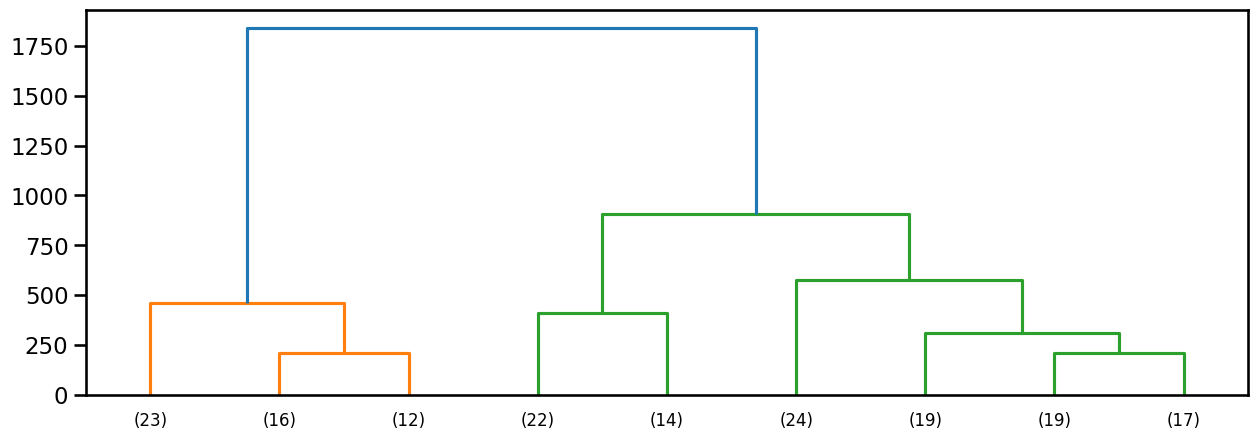

In [33]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method ='ward')

fig, ax = plt.subplots(figsize = (15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=9, truncate_mode= 'lastp',
                           show_leaf_counts=True, ax = ax )

KernelPCA(fit_inverse_transform=True, gamma=0.5, kernel='rbf', n_components=9)


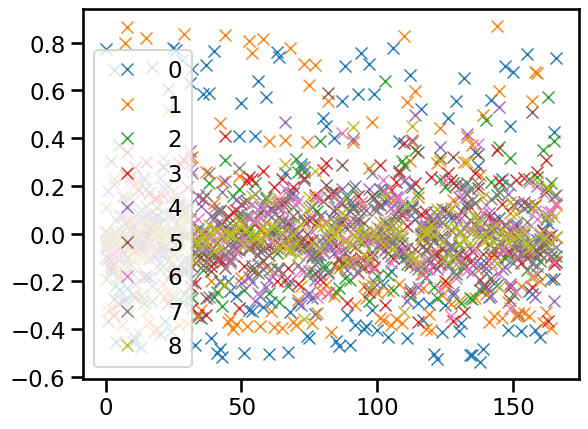

In [39]:
#Kernel PCA 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def scorer (pcamodel, X, y=None):
    try: 
        X_val = X.values
    except:
        X_val = X
        
    data_inv = pcamodel.fit_transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    return -1.0 * mse


param_grid = {
    'gamma': [0.001,0.01,0.1,0.5,1.0],
    'n_components': [2,3,4, 5,6,7,8,9]
}

kernalPCA = GridSearchCV(KernelPCA(kernel ='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring = scorer,
                         n_jobs = -1)
kernalPCA = kernalPCA.fit(Removed_Country_DF)

print(kernalPCA.best_estimator_)

transformed_Kernal_PCA = KernelPCA(kernel = 'rbf', fit_inverse_transform=True, gamma=0.1, n_components=9)

results = transformed_Kernal_PCA.fit_transform(Removed_Country_DF)

kernelPCA_Df = (pd.DataFrame(results))
kernelPCA_Df


ax = kernelPCA_Df.plot(marker='x', ls='')

[Text(0.5, 0, 'Number of Dimensions (Features) [0 = 1]'),
 Text(0, 0.5, 'Percentage Explained By Variance'),
 Text(0.5, 1.0, 'Explained Variance vs Dimensions (Features)')]

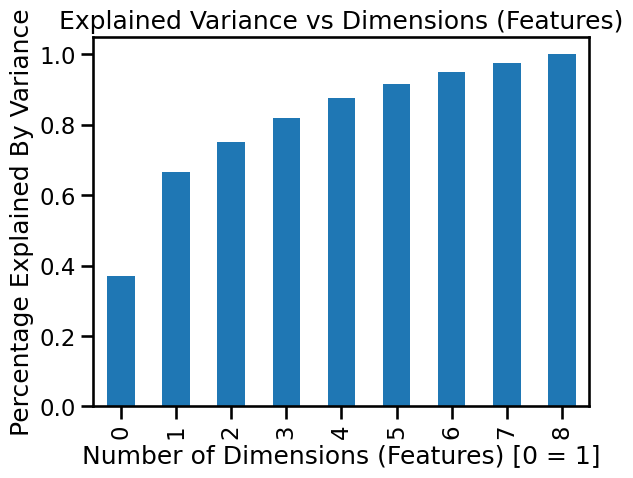

In [68]:
explained_variance = np.var(results, axis = 0)
explained_variance_ratio = explained_variance/ np.sum(explained_variance)
sum_expalined_variance_ratio = np.cumsum(explained_variance_ratio)


Kernal_PCA_Varriance_DF = pd.DataFrame([explained_variance, explained_variance_ratio, sum_expalined_variance_ratio]).T
Kernal_PCA_Varriance_DF.columns = ['Explained_Variance', 'Explained_Variance_Ratio', 'Sum_Explained_Variance_Ratio']

Kernal_PCA_Varriance_DF

sns.set_context('talk')
ax = Kernal_PCA_Varriance_DF['Sum_Explained_Variance_Ratio'].plot(kind = 'bar')

ax.set(
    xlabel = 'Number of Dimensions (Features) [0 = 1]',
    ylabel = 'Percentage Explained By Variance',
    title = 'Explained Variance vs Dimensions (Features)'
)

In [69]:
Kernal_PCA_Varriance_DF

,Explained_Variance,Explained_Variance_Ratio,Sum_Explained_Variance_Ratio
0,0.172169,0.371690,0.371690
1,0.137001,0.295768,0.667458
2,0.038518,0.083155,0.750613
3,0.032359,0.069858,0.820471
4,0.025546,0.055151,0.875623
5,0.018810,0.040609,0.916232
6,0.015595,0.033668,0.949900
7,0.011849,0.025580,0.975480
8,0.011358,0.024520,1.000000


In [63]:
explained_variance

array([0.17216931, 0.13700146, 0.03851786, 0.03235883, 0.02554635,
       0.01881031, 0.01559534, 0.01184871, 0.01135803])

In [60]:
test = np.squeeze(sum_expalined_variance_ratio)
test

array([0.37169042, 0.66745818, 0.75061307, 0.82047144, 0.87562258,
       0.91623151, 0.94989976, 0.97547955, 1.        ])

In [43]:
kernelPCA_Df.abs().sum()

0    59.784677
1    52.326024
2    27.033036
3    24.772927
4    20.364800
5    16.208253
6    16.368292
7    14.728310
8    11.170638
dtype: float64

c:\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


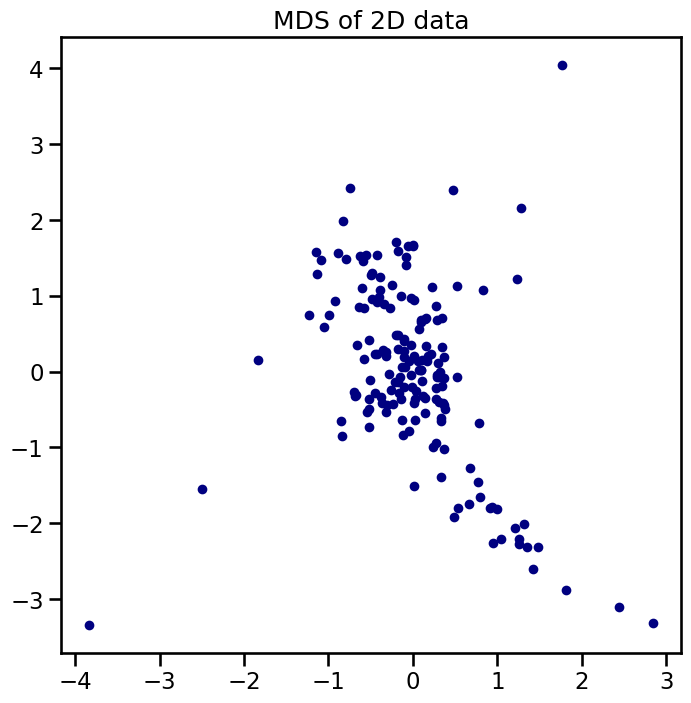

44.650579582795814


In [96]:
# Multi Dimensional Scaling (MDS) 
## Doesn't Preserve Variance -> Instead goal is to maitain geometric distances between points 

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances 

mds = MDS(n_components=6, random_state=0, dissimilarity='euclidean')
mds_transformed = mds.fit_transform(Removed_Country_DF)

plt.figure(figsize=(8, 8))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], color='navy', s=30, marker='o')
plt.title('MDS of 2D data')
plt.show()

embeding = mds.embedding_
stress = mds.stress_
negative_matrix = mds.dissimilarity_matrix_

print(stress)

In [ ]:
n_components = [2,3,4,5,6,7,8,9]
Output_list = [] 
stress_list = [] 
for values in n_components:
    mds = MDS(n_components=values, random_state = 42, dissimilarity='euclidean')
    mds_transformed = mds.fit_transform(Removed_Country_DF)
    embeding = mds.embedding_
    stress = mds.stress_
    negative_matrix = mds.dissimilarity_matrix_
    stress_list.append(
            stress)
    
stress_list

c:\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Python311

[]

In [95]:
MDS_Df_stress = pd.DataFrame([n_components,stress_list]).T
MDS_Df_stress.columns= ['Compnents', 'Stress']

MDS_Df_stress

,Compnents,Stress
0,2.0,2633.920157
1,3.0,642.140828
2,4.0,196.328534
3,5.0,80.436881
4,6.0,50.252286
5,7.0,30.654464
6,8.0,31.818366
7,9.0,28.096330


In [ ]:
final_df # PCA 
kernelPCA_Df # Kernel PCA 
embeding # MDS 

array([[ 1.82722534e+00, -2.58752041e+00],
       [ 4.55456277e-01,  1.15377055e+00],
       [ 1.26468608e+00,  9.00768266e-01],
       [ 2.85123305e+00, -2.54853623e+00],
       [-3.97442825e-01,  9.08634477e-01],
       [ 1.10452834e+00,  1.66891196e+00],
       [ 7.91144534e-01,  9.84263703e-01],
       [-3.05668135e+00,  2.12941713e+00],
       [-3.71163952e+00,  1.68017310e+00],
       [ 1.14205920e+00,  6.71781509e-01],
       [-1.43853803e+00,  7.78693635e-01],
       [-1.47905831e+00,  5.37214319e-01],
       [ 1.19490802e+00,  1.67408673e-01],
       [-5.98001109e-01,  9.86396399e-01],
       [ 9.40049218e-01,  1.47110694e+00],
       [-4.05926563e+00,  9.72651063e-01],
       [ 3.15050617e-01,  1.81515368e-01],
       [ 1.05104893e+00, -2.75818713e+00],
       [ 8.27157659e-01,  2.44526086e-01],
       [ 1.05688185e+00, -9.89863466e-02],
       [ 2.94649487e-01,  1.54485575e+00],
       [ 3.33410021e-01, -1.31921948e+00],
       [ 2.40026282e-01,  9.92092076e-01],
       [-3.

In [82]:
embeding_df = pd.DataFrame(embeding)
embeding_df

,0,1,2,3,4,5,6,7,8
0,0.146212,-0.723561,-1.010993,1.731582,0.498059,-1.659773,0.401290,1.051439,-0.928324
1,0.401251,0.382671,-0.440403,-0.492714,-0.003536,0.167974,-1.078705,-0.578095,0.304361
2,-0.287761,0.637710,-0.769161,-0.259871,-0.249597,0.021084,-0.687754,0.445634,0.173193
3,-0.335461,-0.272650,-1.518167,1.664462,0.082860,-1.785123,1.241224,1.697699,-0.373088
4,0.057140,0.201864,0.322034,-0.506543,-0.084233,0.201651,-0.761302,-0.707848,0.384740
...,...,...,...,...,...,...,...,...,...
162,0.471287,-0.291698,-0.436877,0.732055,0.535508,-0.349008,-0.706478,-0.019122,-0.701699
163,-1.100928,2.013324,-1.571568,-0.026852,0.140266,1.559559,0.423337,1.794941,0.673976
164,0.396360,0.595128,-0.928214,-0.219164,0.096423,0.223908,-0.895338,0.037801,0.061232
165,-0.453377,0.243927,-1.491030,0.886798,-0.118533,-0.585515,-0.017000,1.329602,-0.100454


In [78]:
kernelPCA_Df

,0,1,2,3,4,5,6,7,8
0,0.772852,0.112612,-0.188996,-0.096697,-0.039377,-0.051869,0.002306,0.011127,-0.056141
1,-0.366882,-0.325502,-0.055330,-0.028004,0.176623,-0.107331,-0.006508,-0.028385,-0.017674
2,-0.148468,-0.314287,0.303627,-0.135527,-0.090121,-0.114511,-0.069274,-0.162867,-0.034170
3,0.683992,0.229645,0.001178,-0.342467,-0.042680,-0.273639,-0.069216,0.208434,-0.023390
4,-0.454068,-0.146170,-0.214097,-0.075102,0.008292,-0.020057,-0.085400,0.057285,-0.000503
...,...,...,...,...,...,...,...,...,...
162,0.191991,-0.329959,-0.043970,0.310331,-0.026196,0.175831,-0.015545,0.059449,0.069567
163,0.045594,0.185804,0.571650,-0.367777,0.073364,-0.015614,0.088587,-0.082683,0.192693
164,-0.190790,-0.396381,0.212589,-0.006439,0.091408,-0.097618,0.089710,-0.092323,-0.040586
165,0.425653,-0.116987,0.388828,-0.129758,-0.284087,-0.189192,-0.120364,0.156681,0.070339


2541.2138244002253

In [74]:
mds.dissimilarity_matrix_

array([[0.        , 4.0745764 , 3.50270799, ..., 3.6152439 , 2.17843809,
        0.729211  ],
       [4.0745764 , 0.        , 1.41025922, ..., 0.91446148, 3.06271047,
        4.17094046],
       [3.50270799, 1.41025922, 0.        , ..., 0.95673404, 1.91921849,
        3.55747302],
       ...,
       [3.6152439 , 0.91446148, 0.95673404, ..., 0.        , 2.34812348,
        3.6247481 ],
       [2.17843809, 3.06271047, 1.91921849, ..., 2.34812348, 0.        ,
        2.13731176],
       [0.729211  , 4.17094046, 3.55747302, ..., 3.6247481 , 2.13731176,
        0.        ]])

In [ ]:
New_df_without_Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157344,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312336,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789278,0.670423,-0.038404,-0.465376
3,Angola,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601736,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,-0.225578,-0.336864,-0.501559,-0.342488,-0.738527,-0.489771,-0.852161,0.365754,-0.546913
163,Venezuela,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616852,0.546361,-0.316678,0.029323
164,Vietnam,-0.372315,-0.361463,-0.538491,-0.377572,-0.658404,0.409738,0.286958,-0.661206,-0.637754
165,Yemen,0.448417,-0.392166,-0.550595,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


0


AttributeError: 'bool' object has no attribute 'values'

In [ ]:
# Non-Negative Matrix Factorization - Only Positive Values (Only Add) Different COmpnoents has different output Primarily for Video 

# (Only Positive Values) 
from sklearn.decomposition import NMF

print(np.sum((New_df_without_Countries < 0).values.ravel()))

New_df_without_Countries[New_df_without_Countries <0] = 0

print(np.sum((New_DF_Non_Zeros < 0).values.ravel()))

New_df_without_Countries = New_df.iloc[:,1:10]

model = NMF(n_components=9, init ='random', random_state=42)
results_NMF = model.fit_transform(New_df_without_Countries)

results_NMF.shape



ValueError: Negative values in data passed to NMF (input X)

In [ ]:
# Want to Feature Scale this - Reduce / Chose Columns that are most valiable to the Dataset Itself
# Methods to do So are Dimension REduction or Feature Selection 

######## Dimension Reduction ############ 

# PCA 

# Kernel PCA 

# MDS 

# Non-Negative MAtrix Factorization 



######## Feature Selection ###############

# Filter Methods 

####  Variance Thresholds, Correlation Analysis  or Mutual Information (Calc, Mutual Info b  tw Features and the clustering results) 

# Wrapper Methods 

#### Greedy FOrward Selection 

#### Recursive Feature Elemination 

In [ ]:
# Types of Unsupervised Learning 

# K-Means 

# Hierarchacial Clustering - (Ward Linkage)

# DBSCAN

# Mean Shift 

